<a href="https://colab.research.google.com/github/AleemRahil/Robust-End-to-End-E-Commerce-Analytics-Automation-with-LLMs/blob/main/clv_gbq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modeling Ecommerce CLV in BigQuery

In this project, we'll dive into modeling Customer Lifetime Value (CLV) in a way that helps ecommerce businesses spot their most profitable customer segments. This helps businesses refine strategies around customer acquisition and growth.

Estimating Customer Lifetime Value (CLV) allows ecommerce businesses to grasp the real worth of their customers beyond immediate revenue. The traditional method of calculating CLV by simply adding up all transactions can be misleading, as it compares customers at various stages of their journey without accounting for differences in their lifecycle.

To address this problem, we will use predictive CLV modeling and Google BigQuery, where we can store our estimates for easy and efficient access.

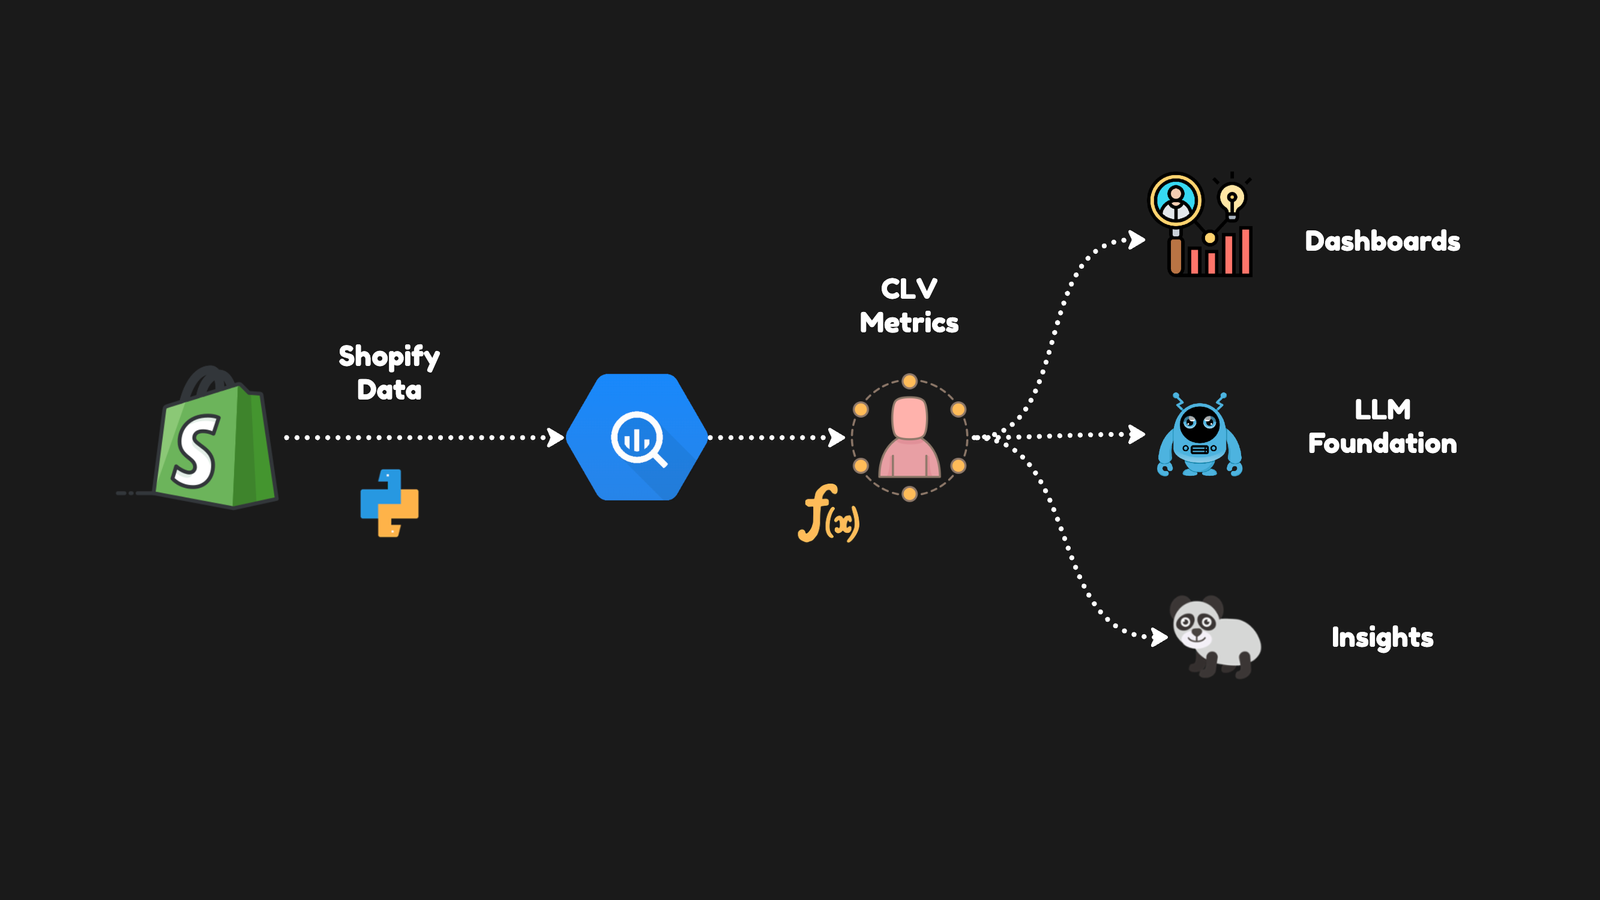

By uploading CLV data into BigQuery, we enable deep analysis and make it easy to generate ad hoc insights, accurately segment customers, and optimize marketing strategies. We also lay the foundation for creating Looker Studio dashboards and chatting with business data using large language models (LLMs).

Here's what we'll cover in this notebook:

*   Using CLV to drive business value
*   Using CLV to drive business value
*   Estimating a CLV model with Shopify data using Python
*   Calculating CLV-based Key Metrics
*   Modeling CLV in BigQuery

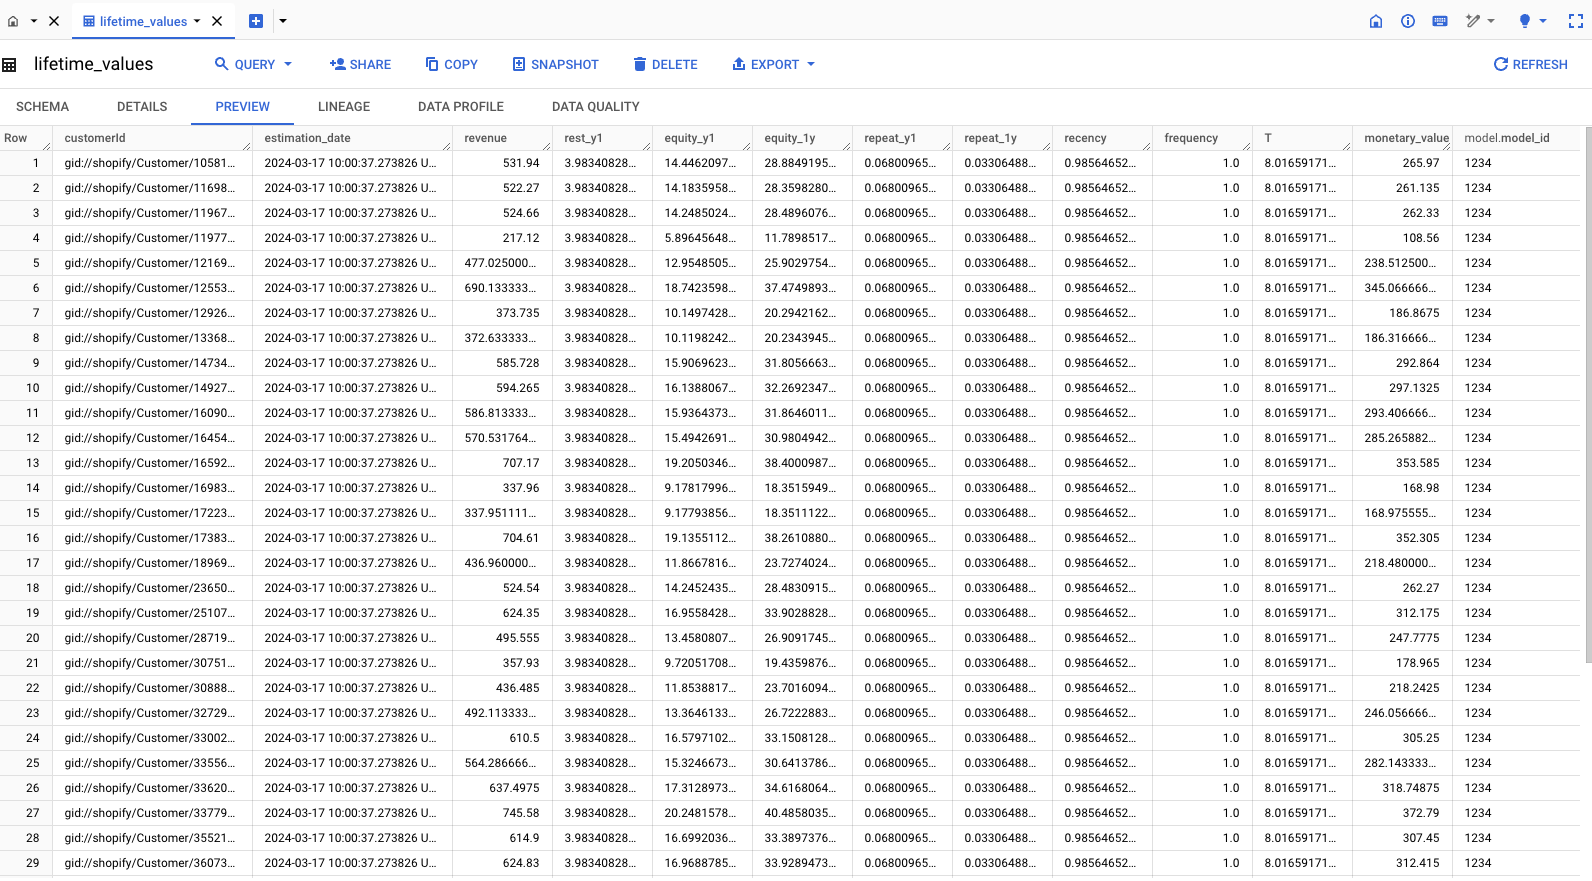

#Driving Business Value with CLV
Understanding Customer Lifetime Value (CLV) is essential for ecommerce businesses. It helps in three ways: optimizing paid traffic, improving email marketing campaigns, and gaining insights from customer data.

Optimizing Paid Traffic: Knowing the CLV helps you spend your advertising budget wisely. You can see which channels bring in the most valuable customers and spend more money there. This leads to better results for the same or even lower costs.

Improving Email Marketing Campaigns: Knowing the CLV allows you to tailor your email campaigns more precisely by segmenting your customers based on their value. High-value customers could receive exclusive offers, motivating them to make additional purchases. For those who spend less, you can design email campaigns to engage them more deeply and gradually boost their spending.

Another key reason for estimating CLV is to enable comparisons between your customers' values. Many ecommerce businesses rely on realized revenue, summing up all transaction values to determine the customer's value. This approach, however, leads to flawed comparisons, as you're essentially comparing customers at different stages of their lifecycle with your business.

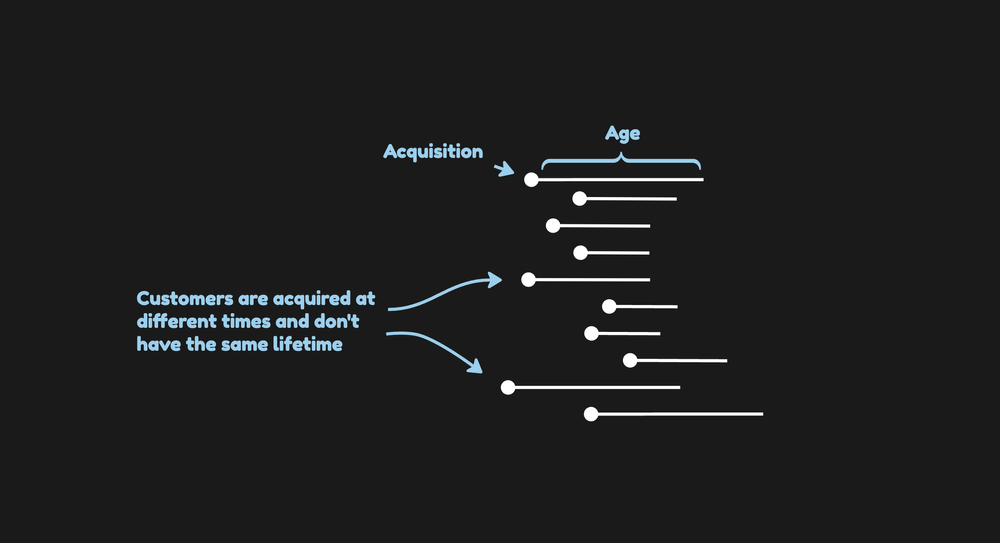

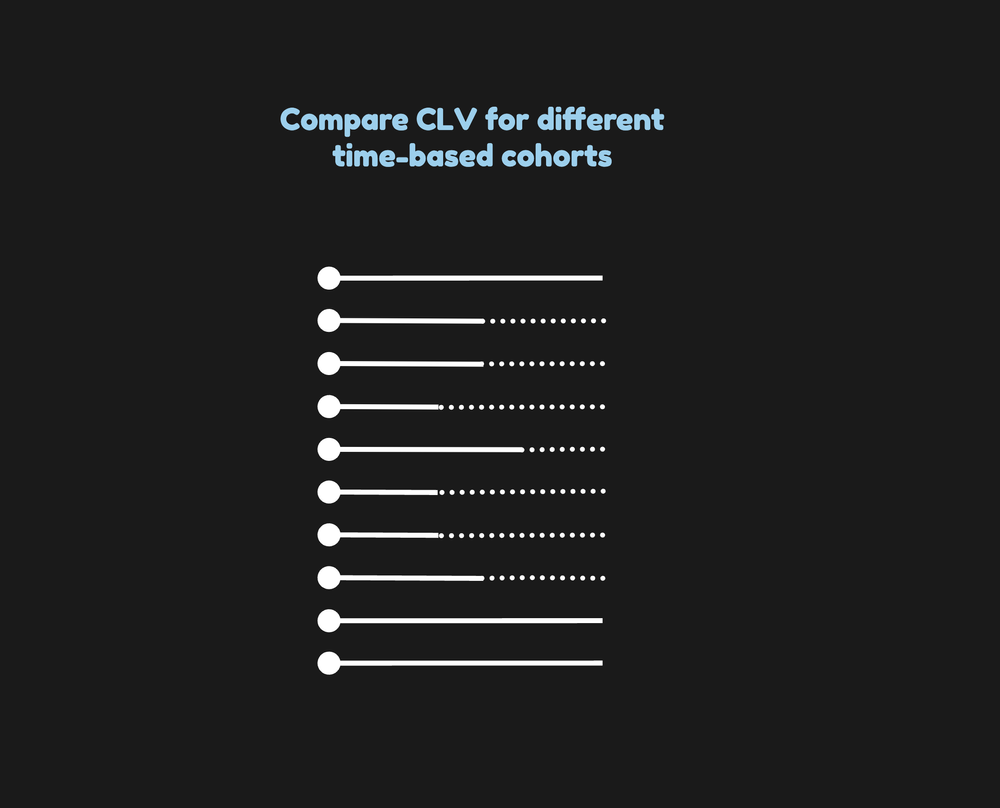

The challenge arises because customers come on board at various times, each with a different potential duration of interaction with our business. For instance, a customer who joined three months ago has had more opportunities to purchase than one who joined today. To make fair comparisons, it's essential to standardize the timeframe over which we evaluate CLV.

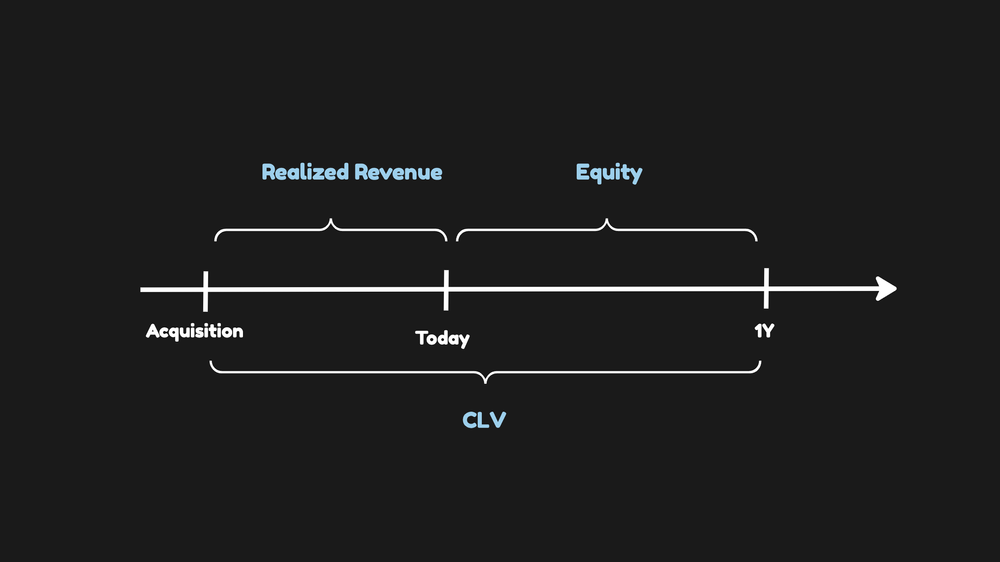

Predictive CLV modeling addresses this issue. For example, if you compare customers over a one-year horizon and you have a customer who was acquired three months ago, you would calculate their CLV by adding the revenue from their first three months to the forecasted revenue for the next nine months. This method produces a CLV that combines both realized and predicted revenue, offering a more accurate and equitable way to assess the value of different customers.

#Estimating The Model
Let's dive into estimating the CLV for a Shopify store. First, ensure you have the necessary tools by installing lifetimes for CLV analysis and google-cloud-bigquery for database interactions:

In [ ]:
!pip install -qU \
  python-dotenv \
  lifetimes \
  google-cloud-bigquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 584.2/584.2 kB 12.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 24.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.1 MB/s eta 0:00:00


I will use the beta_geometric_nbd_model for the CLV model implementation. The BetaGeoFitter and GammaGammaFitter are for fitting your model while summary_data_from_transaction_data, here shortened to summary, transforms transaction data into a summary format (recency, frequency, monetary value) that's ready for analysis:

In [ ]:
import pandas as pd

from lifetimes.datasets import load_transaction_data

from lifetimes.generate_data import beta_geometric_nbd_model
from lifetimes import BetaGeoFitter,GammaGammaFitter

from lifetimes.utils import summary_data_from_transaction_data as summary

After setting up the environment and importing the necessary libraries, the next step is to read the transaction data. This data includes, orderId, customerId, order timestamps, and the transaction amounts.


## Fitting The Model

In [ ]:
df = pd.read_json('clv_orders.json')

In [ ]:
df

,orderId,customerId,createdAt,amount,currencyCode,lineItems,updatedAt
0,gid://shopify/Order/5214430666052,gid://shopify/Customer/1709656502725,1646697600000,218.54,DKK,[{'id': 'gid://shopify/LineItem/52731348412915...,1646697600000
1,gid://shopify/Order/5787017352020,gid://shopify/Customer/6334597549939,1653091200000,477.82,DKK,[{'id': 'gid://shopify/LineItem/57479845489878...,1653091200000
2,gid://shopify/Order/5930497320033,gid://shopify/Customer/3441694805575,1647216000000,379.40,DKK,[{'id': 'gid://shopify/LineItem/53153220065489...,1647216000000
3,gid://shopify/Order/5335703680619,gid://shopify/Customer/3441694805575,1649462400000,319.40,DKK,[{'id': 'gid://shopify/LineItem/54678791017565...,1649462400000
4,gid://shopify/Order/5431868382788,gid://shopify/Customer/3441694805575,1653091200000,120.21,DKK,[{'id': 'gid://shopify/LineItem/58007385400921...,1653091200000
...,...,...,...,...,...,...,...
15268,gid://shopify/Order/5724034314437,gid://shopify/Customer/6808727626562,1652659200000,155.23,DKK,[{'id': 'gid://shopify/LineItem/58071791261633...,1652659200000
15269,gid://shopify/Order/5882817669518,gid://shopify/Customer/6808727626562,1654041600000,85.96,DKK,[{'id': 'gid://shopify/LineItem/57001738635904...,1654041600000
15270,gid://shopify/Order/5163126340090,gid://shopify/Customer/3110738802034,1646179200000,50.25,DKK,[{'id': 'gid://shopify/LineItem/51966421046776...,1646179200000
15271,gid://shopify/Order/5402205439636,gid://shopify/Customer/9824291121536,1646006400000,323.74,DKK,[{'id': 'gid://shopify/LineItem/58496242887975...,1646006400000


The lifetimes library requires data in a summary format, which includes the recency, frequency, and monetary value for each customer. To transform the transaction data accordingly, we define a function called create_summary. This function takes the dataframe as input and computes the summary statistics using the summary_data_from_transaction_data function from lifetimes. It specifies customerId as the customer identifier createdAt as the order timestamp and sets the end of the observation period to '2022-12-31'.

The frequency (freq) parameter is set to 'M' to aggregate data on a monthly basis. Additionally, the function calculates the average transaction amount (monetary_value) for each customer.

In [ ]:
def create_summary(df):
    sf=summary(df,
               'customerId', 'createdAt',
                observation_period_end='2022-12-31',
                freq='M').reset_index()
    monetary=df.groupby('customerId')[['amount']].mean().reset_index()
    monetary=monetary.rename(columns={'amount':'monetary_value'})
    df=monetary.merge(sf, on='customerId')
    return df

The Shopify transaction data, which includes the fields createdAt and updatedAt, comes in a Unix timestamp format (milliseconds since the epoch). To work with these dates effectively in our analysis, I'll convert them into datetime format using pandas

In [ ]:
df['createdAt'] = pd.to_datetime(df['createdAt'], unit='ms')
df['updatedAt'] = pd.to_datetime(df['updatedAt'], unit='ms')

In [ ]:
summary_df=create_summary(df)

In [ ]:
summary_df

,customerId,monetary_value,frequency,recency,T
0,gid://shopify/Customer/1000063723464,192.640000,0.0,0.000000,8.016592
1,gid://shopify/Customer/1000132687696,209.840000,0.0,0.000000,4.008296
2,gid://shopify/Customer/1000277465459,203.260000,1.0,4.008296,8.016592
3,gid://shopify/Customer/1001521614142,304.500000,0.0,0.000000,9.955030
4,gid://shopify/Customer/1002108938620,281.072500,1.0,1.018501,7.030945
...,...,...,...,...,...
4995,gid://shopify/Customer/9984562585486,367.510000,0.0,0.000000,8.016592
4996,gid://shopify/Customer/9989968887144,430.190000,0.0,0.000000,8.016592
4997,gid://shopify/Customer/9994399443691,214.870000,1.0,1.018501,9.035093
4998,gid://shopify/Customer/9994980975966,206.753333,0.0,0.000000,4.008296


With the timestamps properly formatted, we can now create the summary dataframe.

After preparing the summary DataFrame, the next key steps in estimating Customer Lifetime Value (CLV) involve using models to forecast future customer behavior.

First, I use the BetaGeoFitter to estimate a model for purchases. The model implemented in this class helps us understand the purchase cadence and churn rate by fitting to the data points related to the frequency of purchase, recency (the age of the customer at their last purchase), and T (the age of the customer in the timeframe of the study).

I initialize the model with a penalizer_coef of 0.05 to help prevent overfitting and then fit it to our summary dataframe:

In [ ]:
bgf=BetaGeoFitter(penalizer_coef=0.05)
bgf.fit(summary_df['frequency'],summary_df['recency'],summary_df['T'])

<lifetimes.BetaGeoFitter: fitted with 5000 subjects, a: 0.25, alpha: 1.15, b: 0.24, r: 0.19>

Following the fitting of the BetaGeoFitter, I can now model the monetary value associated with each customer. For this, I filter the summary dataframe to include only those customers with a frequency greater than 0, indicating they've made more than one purchase.

This subset is then used to feed the GammaGammaFitter to estimate the average transaction value. Again, I specify a penalizer_coef of 0.01 to mitigate overfitting:

In [ ]:
gf=summary_df[summary_df['frequency']>0]

ggf=GammaGammaFitter(penalizer_coef=0.01)
ggf.fit(gf['frequency'],gf['monetary_value'])

<lifetimes.GammaGammaFitter: fitted with 1537 subjects, p: 4.01, q: 0.36, v: 3.84>

In this case, the q parameter in the fitted model is less than one, indicating that the model's prediction for monetary values may not be as reliable for our dataset. In the Gamma-Gamma model used for predicting customer transaction values the population_mean = v * p / (q - 1) estimates the average monetary value of transactions across the customer base. The parameters v and p shape and scale the transaction value distribution while q measures how spending changes with repeat purchases.

When q<1, it indicates an issue with fitting the model to the data, as the population mean must be positive. This is an often encountered scenario with this model and suggests a more conservative approach, utilizing raw monetary values directly from the data rather than relying on the model's predictive capability for these values.

Given this situation, I will instead turn to the underlying clv function _customer_lifetime_value from the lifetimes.utils package. Unlike the built-in CLV prediction method in the GammaGammaFitter, which estimates future monetary value based on past behavior and model fitting, the function_customer_lifetime_value allows for direct input of monetary values from the dataset.

This function integrates the BetaGeoFitter model (bgf) with the raw monetary values from our summary data. It forecasts the CLV for a specified future period (here time=6 months), applying a discount rate (discount_rate=0.1) to account for the time value of money. The freq="M" argument indicates that our transaction data is aggregated on a monthly basis, aligning with the initial data transformation.

By using _customer_lifetime_value with raw monetary inputs, we ensure a more grounded CLV estimation, particularly suitable for scenarios where predictive modeling of monetary values may not be entirely reliable.

I discuss some of the properties of the CLV model implemented in the Lifetimes library in more detail in this video:

In [ ]:
clv = _customer_lifetime_value(
    bgf,  # our previously fitted BG/NBD model
    summary_df['frequency'],
    summary_df['recency'],
    summary_df['T'],
    summary_df['monetary_value'],  # using raw monetary values
    time=6,  # predicting CLV for 6 months into the future
    discount_rate=0.1,  # applying a discount rate of 10%
    freq="M"  # transactions are recorded on a monthly basis
).to_frame()

#Calculating CLV-based Metrics
We're now set to estimate key CLV-based metrics, enabling more detailed customer analysis. This includes predicting how often customers will buy in the future and their CLV over one-year periods.

The data I'm going to push to BigQuery includes the following fields:

customerId: A unique identifier for each customer, crucial for tracking individual transactions and interactions.

estimate_date: The date on which the CLV and other metrics are calculated, marking a specific point for evaluating customer value.

acquisition_date: The date a customer first purchased or started their relationship with the company, beginning their value generation timeline.

equity_y1: The predicted revenue from a customer from the date of their acquisition until the end of their first year, offering an insight into the initial value of new customers.

equity_1y: Predicted revenue from the customer for the year following the estimation date, providing a future perspective on the customer's value.

purchases_y1: Predicted number of purchases a customer will make from their acquisition up to the end of the first year, indicating early customer engagement.

purchases_1y: Predicted number of purchases within the year after the estimation date, useful for sales forecasting and inventory planning.

revenue_y1: Actual revenue generated by the customer in the year following their acquisition, reflecting their early financial contribution.

revenue: Total revenue a customer has generated up to the current point, showcasing their overall financial impact on the business.

In particular this allows me to calculate

clv_y1: A combination of actual revenue in the first year after acquisition and the predicted revenue for that period, illustrating the customer's value in the initial phase.

clv: The sum of all revenue generated by the customer to date plus predicted future revenue, giving a full picture of the customer's lifetime value.

These metrics together provide a comprehensive view of customer value, capturing both their historical contributions and predicted future impact. This allows businesses to tailor strategies for customer engagement, marketing, and growth.

To prepare the data for upload, we need a few functions:

In [ ]:
from lifetimes.utils import _customer_lifetime_value

def purchases(row, bgf, time):
    return bgf.conditional_expected_number_of_purchases_up_to_time(
        row['rest'],
        row['frequency'],
        row['recency'],
        time)

def equity_1y(bgf, df):
    """Calculates equity for the next year."""
    return _customer_lifetime_value(
        bgf, df['frequency'], df['recency'], df['T'], df['monetary_value'],
        time=12, discount_rate=0.1, freq="M"
    )

def equity_y1(bgf, row):
    rest=row['rest'].values[0]
    """Calculates equity up to 'rest' period from a single row."""
    return _customer_lifetime_value(
        bgf, row['frequency'], row['recency'], row['T'], row['monetary_value'],
        time=rest, discount_rate=0.1, freq="M"
    )


def prepare_model_data(bgf):
    params = vars(bgf)['params_']

    return {
        'model_id': '1234',
        'r': str(params['r']),
        'alpha': str(params['alpha']),
        'a': str(params['a']),
        'b': str(params['b'])
    }



def prepare_for_gbq_upload(summary_df, bgf):
    # Create a copy of the DataFrame to avoid modifying the original data
    df = summary_df.copy()

    # Calculate 'rest' and 'revenue'
    df['rest'] = df.apply(lambda row: max(12 - row['T'], 0), axis=1)
    df['revenue'] = (df['frequency'] + 1) * df['monetary_value']

    # Save 'customerId' and then drop it from the DataFrame for processing
    customer_ids = df['customerId']
    df = df.drop('customerId', axis=1)

    # Calculate 'equity_y1' for each row
    df['equity_y1'] = df.apply(lambda row: equity_y1(bgf,row.to_frame().T).values[0], axis=1)

    # Calculate 'equity_1y' using the _customer_lifetime_value function
    df['equity_1y'] = equity_1y(bgf, df)

    # Calculate 'purchases_y1' and 'purchases_1y' for each row
    df['repeat_y1'] = df.apply(lambda row: purchases(row, bgf, row['T']), axis=1)

    # For 'purchases_1y'
    df['repeat_1y'] = df.apply(lambda row: purchases(row, bgf, 12), axis=1)


    # Reattach 'customerId' to the DataFrame
    df['customerId'] = customer_ids

    # Reorder columns to have 'customerId' at the beginning
    cols = ['customerId'] + [col for col in df.columns if col != 'customerId']
    df = df[cols]


    df['model'] = df.apply(lambda x: prepare_model_data(bgf), axis=1)

    df=df.rename(columns={'rest':'rest_y1'})

    df['estimation_date'] = pd.to_datetime('today')#.strftime('%Y-%m-%d')

    return df


Purchases Prediction: The purchases function estimates the expected number of purchases a customer will make in a specified future time based on their past purchase behavior as captured by the BetaGeoFitter.

Equity Calculation: Two functions equity_1y and equity_y1, calculate the customer equity or value over different time horizons. equity_1y calculates the equity for the next year for all customers, whereas equity_y1 calculates equity up to a 'rest' period for a specific customer. These functions utilize the _customer_lifetime_value utility to incorporate the raw monetary value directly into the CLV estimates.

Model Data Preparation: The prepare_model_data function extracts and formats the fitted model parameters (r, alpha, a, b) for storage or further analysis. This data can be instrumental in understanding the model's behavior and tuning it for specific scenarios.

Finally, we define prepare_for_gbq_upload to prepare a dataframe for upload to BigQuery using the functions I defined above.

## Uploading CLV Estimates to BigQuery

##Modeling CLV in BigQuery
After preparing your data with the prepare_for_gbq_upload function, which formats your CLV estimates and associated metrics, we need to initialize a client, define a CLV schema, and finally upload the data to BigQuery.

Initialize BigQuery Client: First, set up your BigQuery client. This requires specifying your project name and dataset within BigQuery, as well as the path to your service account credentials file. This file contains the credentials for programmatic access to your Google Cloud resources.

In [ ]:
df_upload=prepare_for_gbq_upload(summary_df, bgf)

In [ ]:
from google.cloud import bigquery
from google.oauth2 import service_account

project="rabbitpromotion"
dataset="clv"

service_account_path = './rfmkey.json'

url = f'bigquery://{project}/{dataset}?credentials_path={service_account_path}'

# Setup BigQuery client.
credentials = service_account.Credentials.from_service_account_file(service_account_path)
gbq_client = bigquery.Client(credentials=credentials, project=credentials.project_id)

**Define Table Schema**: Before uploading the data, we define the schema of the BigQuery table. This schema should match the structure of the DataFrame, including the nested model field with its subfields (model_id, r, alpha, a, b).

**Upload Data to BigQuery**: Finally, we can load the DataFrame into the BigQuery table. We specify the job configuration and enforce the table schema during the upload process to ensure data integrity. After initiating the upload with load_table_from_dataframe, wait for the job to complete with job.result().

This should give you a nice CLV table that looks like the following:



In [ ]:
# Create Products Table
dataset_ref = gbq_client.dataset(dataset)

#creating new table with name lifetime_values
clv_table_ref = dataset_ref.table('lifetime_values')

schema=[
    bigquery.SchemaField("customerId", "STRING"),
    bigquery.SchemaField("estimation_date", "TIMESTAMP"),
    bigquery.SchemaField("revenue", "FLOAT"),
    bigquery.SchemaField("rest_y1", "FLOAT"),
    bigquery.SchemaField("equity_y1", "FLOAT"),
    bigquery.SchemaField("equity_1y", "FLOAT"),
    bigquery.SchemaField("repeat_y1", "FLOAT"),
    bigquery.SchemaField("repeat_1y", "FLOAT"),
    bigquery.SchemaField("recency", "FLOAT"),
    bigquery.SchemaField("frequency", "FLOAT"),
    bigquery.SchemaField("T", "FLOAT"),
    bigquery.SchemaField("monetary_value", "FLOAT"),
    # Define the "model" field with a nested structure for model ID and parameters
    bigquery.SchemaField("model", "STRUCT", fields=[
        bigquery.SchemaField("model_id", "STRING"),
        bigquery.SchemaField("r", "STRING"),
        bigquery.SchemaField("alpha", "STRING"),
        bigquery.SchemaField("a", "STRING"),
        bigquery.SchemaField("b", "STRING"),
    ]),
]

clv_table = bigquery.Table(clv_table_ref, schema=schema)
gbq_client.create_table(clv_table)

In [ ]:
# Define the job configuration with schema reinforcement
job_config = bigquery.LoadJobConfig(schema=schema)

# Load the DataFrame into BigQuery
job = gbq_client.load_table_from_dataframe(df_upload, clv_table_ref, job_config=job_config)

# Wait for the job to complete
job.result()

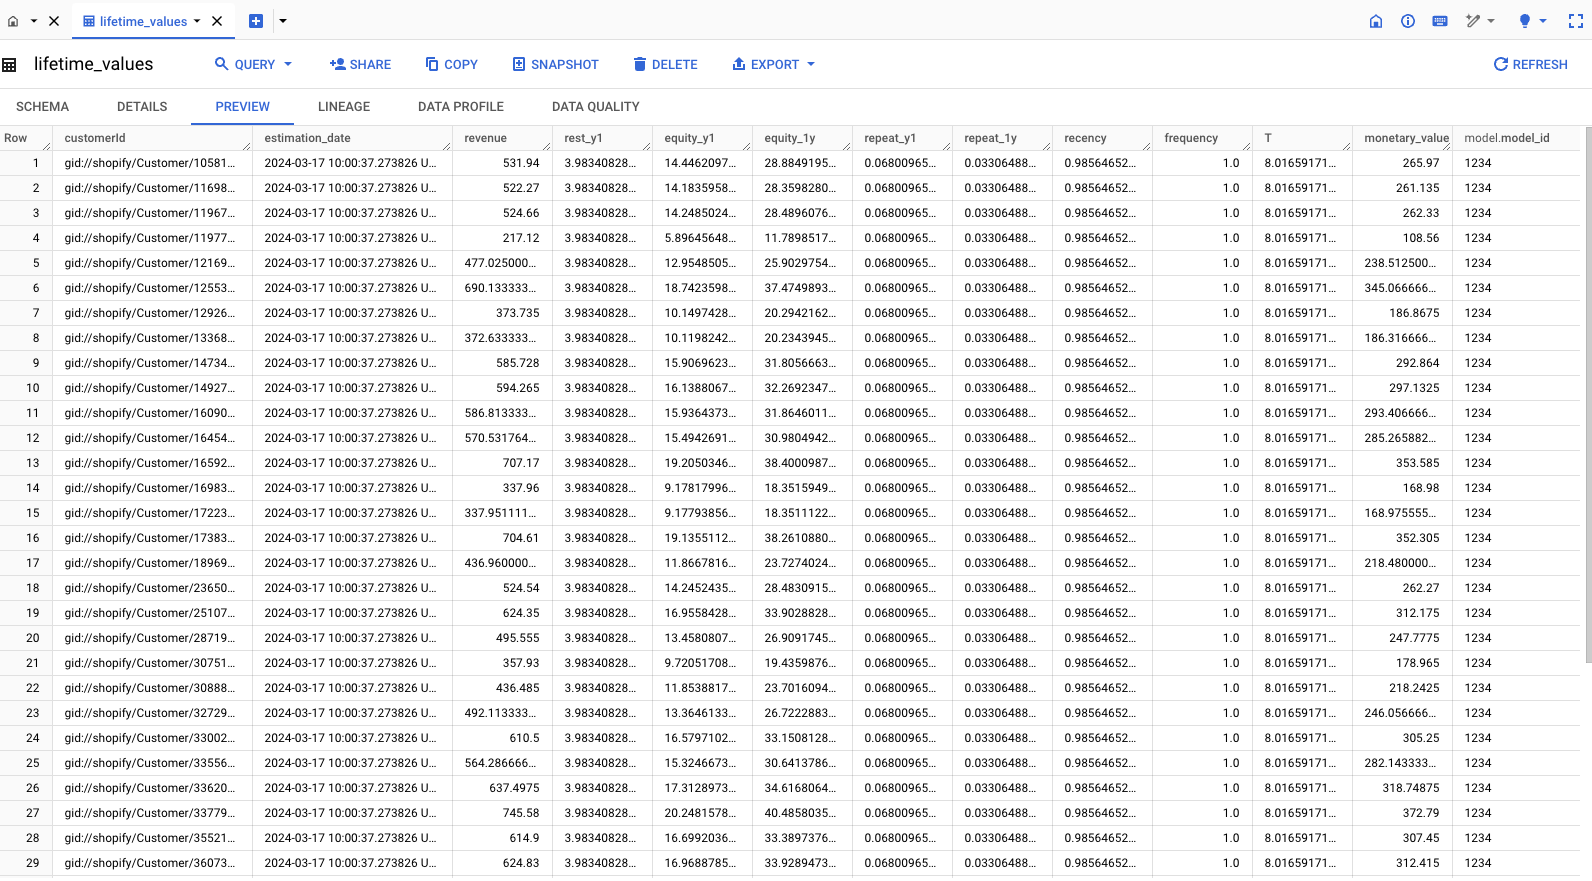

#Re-Estimating The Model
We can easily retrieve the stored model parameters and load them into a new instance of the clv model. This effectively bypasses the need for initial fitting using historical data.

In [ ]:
# Assume loaded_params is your dictionary containing the model parameters
loaded_params = {
    'r': 0.172479,
    'alpha': 1.007875,
    'a': 0.572306,
    'b': 0.482793
}

# Create a new instance of your model
new_bgf = BetaGeoFitter()

# Directly assign the loaded parameters to the new model instance
new_bgf.params_ = pd.Series(loaded_params)

# Your model new_bgf is now ready to use with the loaded parameters

This approach not only saves time but also ensures that we can consistently apply the same model logic over time, even as new data becomes available or analysis needs change.